In [1]:
pip install rasterio matplotlib seaborn scikit-learn pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


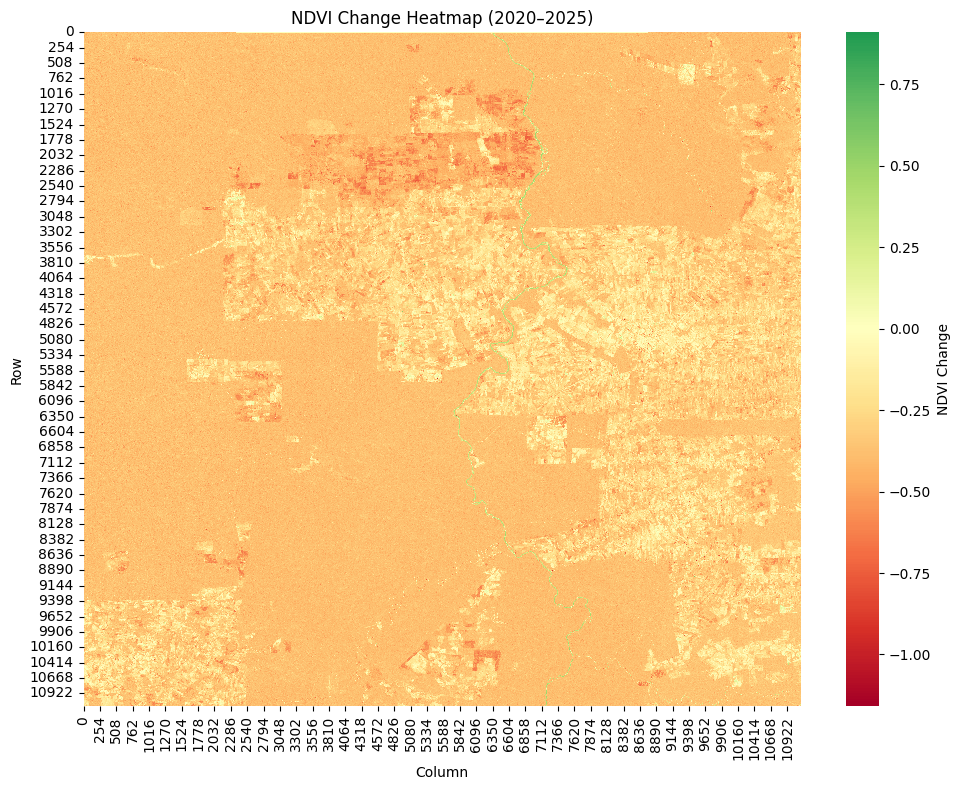

In [ ]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# 📂 File paths
base_path = r"C:\Users\sagni\Downloads\Satellite Image Narrator"
tif_path = os.path.join(base_path, "ndvi_change_amazon.tif")

# ✅ Load NDVI change GeoTIFF
with rasterio.open(tif_path) as src:
    ndvi_change = src.read(1)
    ndvi_change = np.nan_to_num(ndvi_change, nan=0.0)

# -------------------------
# 🔥 1. HEATMAP OF NDVI CHANGE
# -------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(ndvi_change, cmap='RdYlGn', center=0, cbar_kws={'label': 'NDVI Change'})
plt.title("NDVI Change Heatmap (2020–2025)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.tight_layout()
plt.savefig(os.path.join(base_path, "ndvi_heatmap.png"))
plt.show()

# -------------------------
# 🔮 2. SIMULATED TIME SERIES FOR FUTURE PREDICTION
# -------------------------
# For demo: simulate NDVI values over 5 time steps and predict year 6

# Flatten NDVI change image (for simplicity)
flat_ndvi = ndvi_change.flatten()

# Simulate 5 years of NDVI (we reverse-engineer NDVI assuming small change/year)
years = np.array([1, 2, 3, 4, 5])
ndvi_series = []

for value in flat_ndvi:
    base = 0.5  # starting NDVI
    slope = value / 5  # simulate change over 5 years
    ndvi_series.append(base + slope * (years - 1))  # shape: [5]

ndvi_series = np.array(ndvi_series)  # shape: [num_pixels, 5]

# Train regression model per pixel
future_preds = []
for series in ndvi_series:
    X = years.reshape(-1, 1)
    y = series
    model = LinearRegression().fit(X, y)
    y_future = model.predict([[6]])[0]
    future_preds.append(y_future)

# Reshape back to 2D image
future_ndvi = np.array(future_preds).reshape(ndvi_change.shape)

# -------------------------
# 🔥 3. FUTURE NDVI HEATMAP (Predicted for Year 2026)
# -------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(future_ndvi, cmap='YlGn', cbar_kws={'label': 'Predicted NDVI'})
plt.title("Predicted NDVI for Year 2026 (Simulated)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.tight_layout()
plt.savefig(os.path.join(base_path, "predicted_ndvi_2026.png"))
plt.show()
